In [1]:
import pandas as pd
import numpy as np
import geojson
import random
import matplotlib.pyplot as plt
from geojson import Polygon, FeatureCollection, Feature, MultiPolygon, Point
import folium
import matplotlib
from matplotlib.cm import ScalarMappable
import geojsonio
import plotly.plotly as py
import plotly.graph_objs as go


random.seed(2345698)

boxed_baltimore_file = "modified_data/boxed_baltimore.geojson"

In [2]:
pc = pd.read_pickle("modified_data/clean_parking_citations")

In [3]:
with open(boxed_baltimore_file, "r") as bb_file:
    boxed_baltimore_geojson_string = bb_file.read()
    boxed_baltimore_geojson = geojson.loads(boxed_baltimore_geojson_string)

In [4]:
pc.sample(50)

,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,...,OpenPenalty,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Lat,Long,Lat_Long,GeoBox
Citation,,,,,,,,,,,,,,,,,,,,,
96377990,2FLP63,9,16.0,MD,DODGE,700 PRATT ST,18.0,All Other Parking Meter Violations,32.0,2016-04-15 15:16:00,...,0.0,2016-05-18,NaN,NaN,NaN,"700 PRATT ST\nBaltimore, MD\n(39.286097, -76.6...",39.286097,-76.626283,"(39.286097, -76.626283)",311.0
96899233,9BR0553,10,16.0,MD,SUBAR,1700 THAMES ST,18.0,All Other Parking Meter Violations,32.0,2016-05-15 12:52:00,...,0.0,2016-06-15,Fells Point,Southeastern,1.0,"1700 THAMES ST\nBaltimore, MD\n(39.281847, -76...",39.281847,-76.592522,"(39.281847, -76.592522)",316.0
61526720,58EMY,4,18.0,FL,JEEP,800 BOULDIN ST,5.0,Obstruct/Impeding Movement of Pedestrian,77.0,2017-09-10 13:21:00,...,0.0,NaT,NaN,NaN,NaN,"800 BOULDIN ST\nBaltimore, MD\n(39.283099, -76...",39.283099,-76.570525,"(39.283099, -76.570525)",319.0
96313540,4BD5624,03,17.0,MD,HYUND,2300 EUTAW PL,27.0,No Stop/Park Street Cleaning,52.0,2016-03-21 10:33:00,...,0.0,NaT,Reservoir Hill,Central,7.0,"2300 EUTAW PL\nBaltimore, MD\n(39.311866, -76....",39.311866,-76.635403,"(39.311866, -76.635403)",410.0
1205715,7CE8679,01,17.0,MD,KIA,E/S 1500 EDMONDSON,8.0,No Stopping/Standing Tow Away Zone,52.0,2016-09-09 04:55:00,...,0.0,NaT,NaN,NaN,NaN,"1500 EDMONDSON\nBaltimore, MD\n(39.29533, -76....",39.295330,-76.641939,"(39.29533, -76.641939)",359.0
80824502,8230352,0,0.0,GS,DODGE,3400 BLK LOCH RAVEN BLVD SB,32.0,Fixed Speed Camera,40.0,2017-10-18 16:11:00,...,0.0,NaT,NaN,NaN,NaN,"3400 BLK LOCH RAVEN BLVD\nSB Baltimore, MD\n(3...",39.327934,-76.682463,"(39.327934, -76.682463)",453.0
50136440,8CX3486,0,0.0,MD,DODG,Harford Rd SB @ The Alameda,30.0,Red Light Violation,75.0,2017-10-16 11:46:00,...,0.0,NaT,NaN,NaN,NaN,"Harford Rd SB\nAlameda Baltimore, MD\n",NaN,NaN,None,NaN
96054730,3AWY98,7,17.0,MD,TOYOT,400 CLEMENT ST,12.0,No Stopping/Standing Not Tow-Away Zone,32.0,2016-03-22 07:17:00,...,0.0,2016-04-13,NaN,NaN,NaN,"400 CLEMENT ST\nBaltimore, MD\n(39.273861, -76...",39.273861,-76.607971,"(39.273861, -76.607971)",264.0
96557187,77961CF,3,18.0,MD,ACURA,4800 PIMLICO RD,27.0,No Stop/Park Street Cleaning,52.0,2016-04-13 09:35:00,...,0.0,NaT,NaN,NaN,NaN,"4800 PIMLICO RD\nBaltimore, MD\n(39.346505, -7...",39.346505,-76.668884,"(39.346505, -76.668884)",530.0


# Choropleth of All Parking Citations Counts by GeoBox

In [5]:
def getGeoJsonForCountsForSeries(seriesData):
    boxCounts_all = seriesData.value_counts()
    # norm_colors = plt.colors.Normalize(min(boxCounts_all), max(boxCounts_all))
    norm_colors = matplotlib.colors.LogNorm(min(boxCounts_all), max(boxCounts_all))

    scalarMap = ScalarMappable(norm=norm_colors, cmap="viridis")

    featureList = boxed_baltimore_geojson.features.copy()
    for i in range(0, 625):
        c = boxCounts_all.get(i, -1)
        feature = featureList[i]
        if c == -1:
            feature.properties["fill-opacity"] = 0.0
            feature.properties["stroke-width"] = 0
        else:
            feature.properties["fill-opacity"] = 0.8
            fillColorArray = scalarMap.to_rgba(c, alpha = 0.6)
            fillColor = "rgb({}, {}, {})".format(int(fillColorArray[0]*100), int(fillColorArray[1]*100), int(fillColorArray[2]*100))
            feature.properties["fill"] = fillColor
            feature.properties["stroke"] = fillColor
            feature.properties["count"] = str(c)
    return FeatureCollection(featureList)

In [6]:
def foliumMapImageOfGeoJsonCounts(geojsonCounts):
    # geojsonio.display(geojson.dumps(all_parking_tickets_geojson))

    def styleFunction(feature):
        return {
            'fillOpacity': feature["properties"]["fill-opacity"],
            'fillColor': feature["properties"]["fill"],
            'weight': 0
        }

    foliumMap = folium.Map(location=[39.2904, -76.6122], zoom_start=11)
    folium.GeoJson(geojson.dumps(geojsonCounts),
                   name='geojson',
                   style_function = styleFunction
                  ).add_to(foliumMap)
    return foliumMap

First, we are interested in creating a basic choropleth using just the raw counts of parking citations to see if anything pops up. 

In [7]:
foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc["GeoBox"]))

In the above map, the yellow boxes have the highest counts of parking citations and the purple boxes have the lowest counts.  Any box without a color has no parking citations.

Now, looking at map, we can see most of the parking citations are issued in the heart of Baltimore City, near downtown Baltimore and the inner harbor.  This isn't necessarily surprising because I would guess that this the area that sees the most tourists and business professionals, so on any given day there is a lot of people.  This means that raw counts of citations are going to go up because more people equal more cars.

Additionally, it is possible that there are more citations because there are more cops.  For instance, if you go to the Hippodrome or Lexington market, there are police wandering the roads.

One thing that is really interesting about this map is the boxes that don't seem to fit the pattern of "yellow in the middle of the city towards a purple as you go further out of the city".  We will have to dig in deeper to see what could be causing those yellow boxes that don't fit the pattern.

# Maps for the Top 5 Descriptions

One of the first things we are going to do is create choropleths for the top 5 parking citation descriptions.  In this case, we are going to create the choropleths off of the top 5 descriptions for ALL data, regardless of whether or not it has geo.  It is important to note that we are making the assumption that the data with geo for a specific descriptions is fairly representative of the data without geo.

A list of all parking citations are below:

In [8]:
all_description_counts = pc["Description"].value_counts()
top5 = all_description_counts[0:5]
print(all_description_counts)

All Other Parking Meter Violations           225391
Fixed Speed Camera                           112331
No Stop/Park Street Cleaning                  92604
No Stopping/Standing Not Tow-Away Zone        75032
No Stopping/Standing Tow Away Zone            73285
Expired Tags                                  68463
Residential Parking Permit Only               51405
All Other Stopping or Parking Violations      29834
Red Light Violation                           23528
In Transit Zone/Stop                          14336
Obstruct/Impeding Movement of Pedestrian      12398
Less Than 15 feet from Fire Hydrant            7857
No Stopping//Parking Stadium Event Camden      7308
Passenger Loading Zone                         7262
Exceeding 48 Hours                             5743
No Stop/Park Handicap                          4905
Abandonded Vehicle                             4325
Obstruct/Impeding Flow of Traffic              3613
Commercial Veh/Residence under 20,000 lbs      2141
Fire Lane/Ha

In [9]:
description = top5.index[0]
print(description)
foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc[pc["Description"] == description]["GeoBox"]))

All Other Parking Meter Violations


We are not entirely sure what citations with the description "All Other Parking Meter Violations" are for.  Most likely, these include offenses such as letting time run out on a parking meter or parking at a meter during a day/time that you are not supposed to be parking there.  In this case, it would make sense that most of the citations would be in Downtown Baltimore, which is primarily metered.

In [10]:
description = top5.index[1]
print(description)
speed_cam_map = foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc[pc["Description"] == description]["GeoBox"]))
speed_cam_map

Fixed Speed Camera


Ah ha!  This very likely explains those yellow boxes that didn't match with the general pattern of more citations in the center of the city and less as you move outwards.  Let's confirm this by looking at two of the yellow boxes in the first map that was for the counts of all parking citations.  Those boxes very likely have a higher proportion of Fixed Speed Camera tickets.

Note that you will have to (uncomment and) look at the geojsonio link to easily see the labels of the boxes. By looking at the map, we saw that boxes 255 and 447 fit the "yellow in a purple zone" pattern.  Let's break down the descriptions in those boxes:

In [11]:
# geojsonio.display(geojson.dumps(getGeoJsonForCountsForSeries(pc["GeoBox"])))

'http://geojson.io/#id=gist:/3392f319f6ae84d6b488eba58d41c778'

In [12]:
speedCamera_255_counts = pc[pc["GeoBox"] == 255]["Description"].value_counts().sort_index()
speedCamera_447_counts = pc[pc["GeoBox"] == 447]["Description"].value_counts().sort_index()

print("Box 255 Breakdown")
print(speedCamera_255_counts)
print()
print("Box 447 Breakdown")
print(speedCamera_447_counts)

Box 255 Breakdown
Abandonded Vehicle                              3
All Other Stopping or Parking Violations        5
Exceeding 48 Hours                              2
Expired Tags                                   14
Fixed Speed Camera                          21520
In Transit Zone/Stop                            1
Less Than 15 feet from Fire Hydrant             2
No Stop/Park Handicap                           1
No Stopping/Standing Not Tow-Away Zone          7
No Stopping/Standing Tow Away Zone              4
Obstruct/Impeding Flow of Traffic               1
Passenger Loading Zone                          1
Name: Description, dtype: int64

Box 447 Breakdown
Abandonded Vehicle                              15
All Other Parking Meter Violations               1
All Other Stopping or Parking Violations        10
Commercial Veh/Residence over 20,000 lbs         1
Commercial Veh/Residence under 20,000 lbs       14
Exceeding 48 Hours                              16
Expired Tags             

So we were going to do a bar graph to compare the breakdown of box 447 and 255; however, we printed out the values and saw there was no need to.  In both of these boxes, the Fixed Speed Camera citations were clearly the cause for the large numbers and why these boxes were yellow in the choropeth map for all citations.  These boxes probably have at least one speed camera in them.  We will map the [OpenBaltimore Fixed Speed Cameras dataset](https://data.baltimorecity.gov/Transportation/Fixed-Speed-Cameras/aqgr-xx9h) on the above map to see what we find.

In [13]:
speed_cams = pd.read_csv("data/Fixed_Speed_Cameras.csv")

pointFeatureList = []
for pt in speed_cams["Location 1"]:
    split = pt.split(",")
    lat = float(split[0].strip()[1:])
    long = float(split[1].strip()[:-1])
    pointFeatureList.append(Feature(geometry = Point((long, lat))))
speed_cam_geojson = FeatureCollection(pointFeatureList)

def pointStyleFunction(feature):
    return {
        "icon": {
            "iconSize": [10,10]
        },
        "radius": 500,
        "color": "red"
    }

folium.GeoJson(geojson.dumps(speed_cam_geojson),
               name="geojson",
               style_function = pointStyleFunction
              ).add_to(speed_cam_map)
speed_cam_map

Well, that didn't provide the insight that we hoped it would.  We expected that the cameras would correspond with the boxes that have Fixed Speed Camera citations in them, but apparently they don't.  So, how many Fixed Speed Camera citations are missing geo information?

In [28]:
fixed_speed_camera_all = pc[pc["Description"] == "Fixed Speed Camera"]
fixed_speed_camera_all_count = len(fixed_speed_camera_all)
fixed_speed_camera_withgeo = pc[(pc["Description"] == "Fixed Speed Camera") & (pc["GeoBox"].isnull())]
fixed_speed_camera_withgeo_count = len(fixed_speed_camera_withgeo)

print("{:.2f}%".format((fixed_speed_camera_withgeo_count/fixed_speed_camera_all_count)*100))

4.83%


In [27]:
len(speed_cams["intersection"].unique())

74

So, less than 5% of the citations that have the description of "Fixed Speed Camera" actually have geo information.  This renders the above map useless since it is visualizing a minority of the data.  Given the Fixed Speed Camera locations, we would say that one of the following are happening:

1) OpenBaltimore does not want to publish the data, which seems doubtful since they publish the citations and the speed camera locations, albeit they did so separately

2) The fixed speed cameras are not "fixed"

3) The fixed speed cameras do not have the appropriate information to be geotagged

4) The data is questionable.  This is entirely possible since the description for the [Fixed Speed Cameras](https://data.baltimorecity.gov/Transportation/Fixed-Speed-Cameras/aqgr-xx9h) states:

> In addition to the eight portable speed enforcement units, the city has retrofitted 50 red light camera locations with the automated speed enforcement technology.

However, the above cell shows that there are 74 unique addresses that the fixed cameras are at; this is not the expected 50-58 as written in the description.

One of the things we might have been able to determine from the Fixed Speed Camera citations geo data is where do drivers typically go fast.  This could indicate streets that do not have heavy traffic.  Or, it could indicate streets that are heavily used.  One problem with this approach is the fact that the data would be inherently skewed because the speed cameras were placed in certain locations probably based on some assumptions.

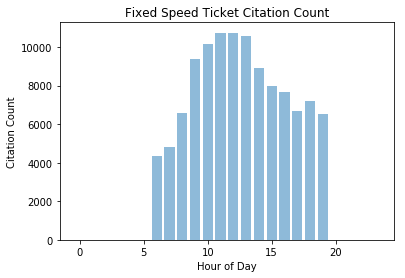

In [37]:
ticket_hours = fixed_speed_camera_all["ViolDate"].map(lambda x: x.hour).value_counts()
hourList = list(range(0,24))
matchingTicketCount = []
for i in hourList:
    matchingTicketCount.append(ticket_hours.get(i, 0))

plt.bar(hourList, matchingTicketCount, align='center', alpha=0.5)
plt.xlabel("Hour of Day")
plt.ylabel('Citation Count')
plt.title('Fixed Speed Ticket Citation Count')
 
plt.show()

The above bar chart shows that the Fixed Speed Camera citations only occur between 6 AM and 7 PM.  That is exceedingly surprising and points to bad data.  One would think that night tickets would occur and potentially occur more frequently because there *should* be less traffic.

In [14]:
description = top5.index[2]
print(description)
foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc[pc["Description"] == description]["GeoBox"]))

No Stop/Park Street Cleaning


In [15]:
description = top5.index[3]
print(description)
foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc[pc["Description"] == description]["GeoBox"]))

No Stopping/Standing Not Tow-Away Zone


In [16]:
description = top5.index[4]
print(description)
foliumMapImageOfGeoJsonCounts(getGeoJsonForCountsForSeries(pc[pc["Description"] == description]["GeoBox"]))

No Stopping/Standing Tow Away Zone


However, one thing we want to verify is that the distribution of the descriptions of points with GeoPoints (and thus geo boxes) is similar to the distribution of descriptions for the whole dataset.

In [17]:
all_counts = pc["Description"].value_counts().sort_index()
records_with_geo_counts = pc[pc["GeoBox"].isnull()]["Description"].value_counts().sort_index()
labels = all_counts.index.values 
all_count_vals = all_counts.values
records_with_geo_counts_vals = records_with_geo_counts.values

datadict = {
    "Description_All_Percents" : [],
    "Description_WithGeo_Percents": []
}

for i in range(len(labels)):
    percent_all = float("{:.2f}".format(all_count_vals[i]/np.sum(all_count_vals)*100))
    percent_geo = float("{:.2f}".format(records_with_geo_counts_vals[i]/np.sum(records_with_geo_counts_vals)*100))
    datadict["Description_All_Percents"].append(percent_all)
    datadict["Description_WithGeo_Percents"].append(percent_geo)

pd.DataFrame(data = datadict, index = labels).sort_values(by = "Description_All_Percents", axis = 0, ascending = False)

,Description_All_Percents,Description_WithGeo_Percents
All Other Parking Meter Violations,27.34,35.90
Fixed Speed Camera,13.62,2.14
No Stop/Park Street Cleaning,11.23,9.86
No Stopping/Standing Not Tow-Away Zone,9.10,8.23
No Stopping/Standing Tow Away Zone,8.89,11.64
Expired Tags,8.30,5.78
Residential Parking Permit Only,6.23,5.81
All Other Stopping or Parking Violations,3.62,3.88
Red Light Violation,2.85,9.27
In Transit Zone/Stop,1.74,1.74
